In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os

for dirname, _, filenames in os.walk("data/aapl-options-data-2020-2023"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/aapl-options-data-2020-2023/aapl_2016_2020.csv
data/aapl-options-data-2020-2023/aapl_2021_2023.csv


In [8]:
df_raw = pd.read_csv("data/aapl-options-data-2020-2023/aapl_2021_2023.csv")
columns = df_raw.columns
columns = [s.replace("[", "") for s in columns]
columns = [s.replace("]", "") for s in columns]
columns = [s.replace(" ", "") for s in columns]
df_raw.columns = columns
df_raw

/var/folders/86/qt4jnsg167j7h7mqgbpp44kh0000gn/T/ipykernel_17513/1462759882.py:1: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("data/aapl-options-data-2020-2023/aapl_2021_2023.csv")


,QUOTE_UNIXTIME,QUOTE_READTIME,QUOTE_DATE,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_DATE,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,...,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT
0,1656705600,2022-07-01 16:00,2022-07-01,16.0,138.90,2022-07-01,1656705600,0.00,1.00000,0.00000,...,0.020000,-0.00093,0.00004,0.00011,-0.00547,0.0,4.889460,0.000000,68.9,0.496
1,1656705600,2022-07-01 16:00,2022-07-01,16.0,138.90,2022-07-01,1656705600,0.00,1.00000,0.00000,...,0.010000,-0.00066,0.00001,0.00061,-0.00491,0.0,4.422080,0.000000,63.9,0.460
2,1656705600,2022-07-01 16:00,2022-07-01,16.0,138.90,2022-07-01,1656705600,0.00,1.00000,0.00000,...,0.010000,-0.00108,0.00009,-0.00012,-0.00455,0.0,3.984220,0.000000,58.9,0.424
3,1656705600,2022-07-01 16:00,2022-07-01,16.0,138.90,2022-07-01,1656705600,0.00,1.00000,0.00000,...,0.010000,-0.00100,0.00015,-0.00018,-0.00525,0.0,3.571790,0.000000,53.9,0.388
4,1656705600,2022-07-01 16:00,2022-07-01,16.0,138.90,2022-07-01,1656705600,0.00,0.99404,0.00067,...,0.010000,-0.00138,0.00014,0.00025,-0.00453,0.0,3.180820,0.000000,48.9,0.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548158,1664568000,2022-09-30 16:00,2022-09-30,16.0,138.09,2025-01-17,1737147600,840.04,0.14059,0.00348,...,112.2,-1.00000,0.00000,0.00000,0.00000,0.0,,0.000000,131.9,0.955
548159,1664568000,2022-09-30 16:00,2022-09-30,16.0,138.09,2025-01-17,1737147600,840.04,0.12515,0.00325,...,122.0,-1.00000,0.00000,0.00000,0.00000,0.0,,0.000000,141.9,1.028
548160,1664568000,2022-09-30 16:00,2022-09-30,16.0,138.09,2025-01-17,1737147600,840.04,0.10893,0.00298,...,132.24,-1.00000,0.00000,0.00000,0.00000,0.0,,0.000000,151.9,1.100
548161,1664568000,2022-09-30 16:00,2022-09-30,16.0,138.09,2025-01-17,1737147600,840.04,0.09147,0.00260,...,149.28,-1.00000,0.00000,0.00000,0.00000,0.0,,0.000000,161.9,1.173


In [14]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548163 entries, 0 to 548162
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   QUOTE_UNIXTIME       548163 non-null  int64  
 1   QUOTE_READTIME       548163 non-null  object 
 2   QUOTE_DATE           548163 non-null  object 
 3   QUOTE_TIME_HOURS     548163 non-null  float64
 4   UNDERLYING_LAST      548163 non-null  float64
 5   EXPIRE_DATE          548163 non-null  object 
 6   EXPIRE_UNIX          548163 non-null  int64  
 7   DTE                  548163 non-null  float64
 8   C_DELTA              548163 non-null  float64
 9   C_GAMMA              548163 non-null  float64
 10  C_VEGA               548163 non-null  float64
 11  C_THETA              548163 non-null  float64
 12  C_RHO                548163 non-null  float64
 13  C_IV                 548163 non-null  object 
 14  C_VOLUME             548163 non-null  object 
 15  C_LAST           

In [17]:
date_columns = ["QUOTE_READTIME", "QUOTE_DATE", "EXPIRE_DATE"]
numeric_cols = df_raw.columns.to_list()
numeric_cols.remove("QUOTE_READTIME")
numeric_cols.remove("QUOTE_DATE")
numeric_cols.remove("EXPIRE_DATE")

df_numeric = df_raw.drop(columns=date_columns)

for i in numeric_cols:
    df_numeric[i] = pd.to_numeric(numeric_df[i], errors="coerce")

df_final = df_numeric.drop(columns=["C_SIZE", "P_SIZE"])
# df_final = df_final.drop(columns=date_columns)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548163 entries, 0 to 548162
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   QUOTE_UNIXTIME       548163 non-null  int64  
 1   QUOTE_TIME_HOURS     548163 non-null  float64
 2   UNDERLYING_LAST      548163 non-null  float64
 3   EXPIRE_UNIX          548163 non-null  int64  
 4   DTE                  548163 non-null  float64
 5   C_DELTA              548163 non-null  float64
 6   C_GAMMA              548163 non-null  float64
 7   C_VEGA               548163 non-null  float64
 8   C_THETA              548163 non-null  float64
 9   C_RHO                548163 non-null  float64
 10  C_IV                 518320 non-null  float64
 11  C_VOLUME             493453 non-null  float64
 12  C_LAST               547968 non-null  float64
 13  C_BID                547968 non-null  float64
 14  C_ASK                547968 non-null  float64
 15  STRIKE           

array([[<Axes: title={'center': 'DTE'}>]], dtype=object)

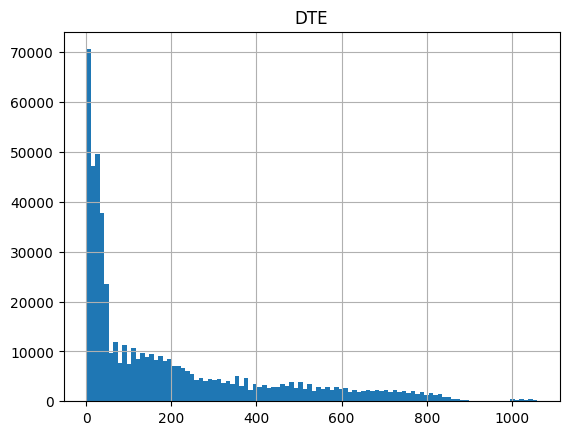

In [18]:
df_numeric.hist(column="DTE", bins=100)

### As we can see, there is a heavy skew towards shorter contracts in this dataset. 

In order to use this data for a viable trading strategy, we may want to consider truncating some longer duration contracts. The strategy proposed by https://tastytrade.com/, an options trading brokerage, recommends staying in the 45-60 day range when using the majority of trading strategies. We will explore the statistical backing behind this recommendation.

P.S. - I have no affiliation with TastyTrade, just a fan of their work and free learning materials!

In [30]:
pd.DataFrame(df_numeric.DTE.value_counts()).head(20)

,count
DTE,
3.0,8103
1.0,8097
2.0,8070
0.0,7887
8.0,7483
9.0,7410
7.0,7279
4.0,7268
10.0,7241


Text(0.5, 1.0, 'AAPL Stock Price - 2021 to 2023')

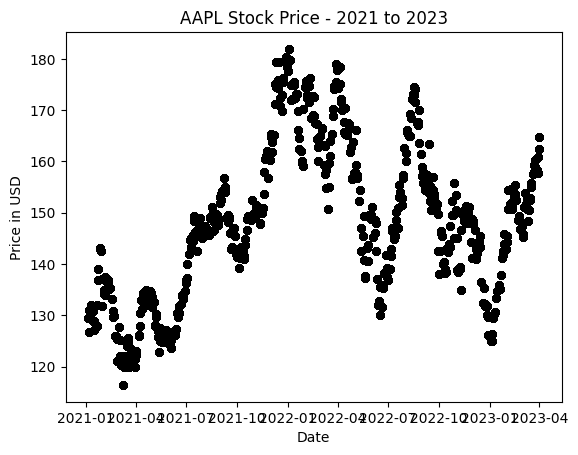

In [24]:
plt.scatter(
    pd.to_datetime(df_numeric["QUOTE_UNIXTIME"], unit="s"), df_numeric["UNDERLYING_LAST"], color="black", alpha=0.003
)
plt.ylabel("Price in USD")
plt.xlabel("Date")
plt.title("AAPL Stock Price - 2021 to 2023")